<a href="https://colab.research.google.com/github/Mrkalyan123/email-spamming/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing packages
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Email_Spam_Detection.csv')
df.head()

,Email_ID,Subject_Length,Sender_Domain,Attachment,Has_Special_Characters,Body_Length,Number_of_Links,Spam_Score,Sender_Region,Is_Spam,Priority
0,b9ce3598-3e59-49ae-85f4-7ec013d2104d,61,company.com,False,True,NaN,0,NaN,EU,0,3
1,5fc3ceda-375b-4dd1-abb3-aad80f915570,12,yahoo.com,True,False,193.0,0,0.173907,EU,1,3
2,6c307d94-5e44-46d3-b9ff-bf5ff561563a,23,spam.com,True,False,357.0,4,0.994839,Africa,1,3
3,bad21200-c759-4ef1-a23f-1c79d761a074,57,spam.com,False,False,373.0,2,0.583310,Africa,1,1
4,03016024-e2e3-4093-a5e9-764fa3d8795f,15,yahoo.com,NaN,True,298.0,1,NaN,EU,0,1


In [7]:
# See the no. of rows and columns
df.shape

(1000, 11)

In [8]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Email_ID', 'Subject_Length', 'Sender_Domain', 'Attachment', 'Has_Special_Characters', 'Body_Length', 'Number_of_Links', 'Spam_Score', 'Sender_Region', 'Is_Spam', 'Priority']


In [9]:
# Display data type of each feature
df.dtypes

,0
Email_ID,object
Subject_Length,int64
Sender_Domain,object
Attachment,object
Has_Special_Characters,bool
Body_Length,float64
Number_of_Links,int64
Spam_Score,float64
Sender_Region,object
Is_Spam,int64


In [10]:
df.describe()

,Subject_Length,Body_Length,Number_of_Links,Spam_Score,Is_Spam,Priority
count,1000.000000,940.000000,1000.000000,873.000000,1000.000000,1000.000000
mean,52.552000,263.862766,1.981000,0.499392,0.485000,1.988000
std,27.777849,138.952215,1.415147,0.291077,0.500025,0.824946
min,5.000000,20.000000,0.000000,0.000436,0.000000,1.000000
25%,29.000000,140.000000,1.000000,0.254240,0.000000,1.000000
50%,53.000000,265.500000,2.000000,0.478017,0.000000,2.000000
75%,77.000000,381.250000,3.000000,0.752187,1.000000,3.000000
max,99.000000,499.000000,4.000000,0.994861,1.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Email_ID                1000 non-null   object 
 1   Subject_Length          1000 non-null   int64  
 2   Sender_Domain           1000 non-null   object 
 3   Attachment              941 non-null    object 
 4   Has_Special_Characters  1000 non-null   bool   
 5   Body_Length             940 non-null    float64
 6   Number_of_Links         1000 non-null   int64  
 7   Spam_Score              873 non-null    float64
 8   Sender_Region           1000 non-null   object 
 9   Is_Spam                 1000 non-null   int64  
 10  Priority                1000 non-null   int64  
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 79.2+ KB


In [12]:
# find the null values
df.isnull().sum()

,0
Email_ID,0
Subject_Length,0
Sender_Domain,0
Attachment,59
Has_Special_Characters,0
Body_Length,60
Number_of_Links,0
Spam_Score,127
Sender_Region,0
Is_Spam,0


In [13]:
# Remove unwanted columns
df.drop(columns=['Email_ID', 'Sender_Region'], inplace=True)  # specify the columns to remove

In [14]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns


In [16]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [17]:
# find the null values
df.isnull().sum()

,0
Subject_Length,0
Sender_Domain,0
Attachment,0
Has_Special_Characters,0
Body_Length,0
Number_of_Links,0
Spam_Score,0
Is_Spam,0
Priority,0


In [18]:
df.size

9000

In [19]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [20]:
df.head()

,Subject_Length,Sender_Domain,Attachment,Has_Special_Characters,Body_Length,Number_of_Links,Spam_Score,Is_Spam,Priority
0,61,0,0,True,263.862766,0,0.499392,0,3
1,12,4,1,False,193.000000,0,0.173907,1,3
2,23,3,1,False,357.000000,4,0.994839,1,3
3,57,3,0,False,373.000000,2,0.583310,1,1
4,15,4,1,True,298.000000,1,0.499392,0,1


In [21]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [22]:
df.head()

,Subject_Length,Sender_Domain,Attachment,Has_Special_Characters,Body_Length,Number_of_Links,Spam_Score,Is_Spam,Priority
0,0.595745,0,0,True,0.509108,0.00,0.501754,0.0,1.0
1,0.074468,4,1,False,0.361169,0.00,0.174444,1.0,1.0
2,0.191489,3,1,False,0.703549,1.00,0.999978,1.0,1.0
3,0.553191,3,0,False,0.736952,0.50,0.586142,1.0,0.0
4,0.106383,4,1,True,0.580376,0.25,0.501754,0.0,0.0


In [23]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Is_Spam', axis=1)  # -- independent variable
y = df['Is_Spam'] # -- dependent variable

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [44]:
print("Logistic Regression Accuracy:", logreg_accuracy*100)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 47.0
Logistic Regression Confusion Matrix:
 [[64 36]
 [70 30]]


In [45]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [47]:
print("Random Forest Accuracy:", rf_accuracy*100)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 50.0
Random Forest Confusion Matrix:
 [[62 38]
 [62 38]]


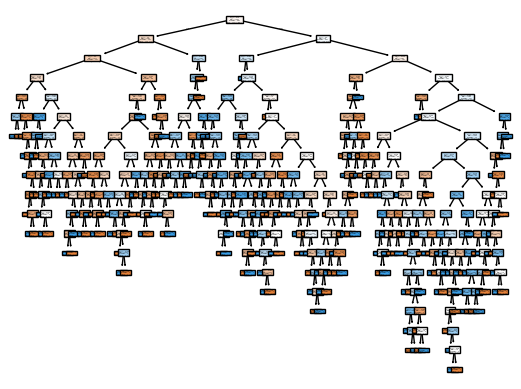

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [49]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [50]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
